#                                           PHASE 3 PROJECT.

# Predictive Analysis for cusrtomer churn in Syria Tel.

# Business Understanding.

Syria Tel, a telecommunication company, is experiencing high customer churn rates(meaning customers are stopping their service and going to competitors).

This leads to lost revenue and potential decline in their market share. The company wants to reduce customer churn to increase revenue and customer retention, which will be done through analysing historical customer data and using advanced analytics and predictive modelling.

By predicting which customers are likely to leave, the company can take proactive measures to retain them, gaining a foothold in the telecommunication industry.

The Key Stakeholders include:
1. Syria Tel Management; whose interests are strategies to reduce churn.
2. The Marketing Team; whose interests are holding campaigns for customer retention towards the atrisk customers.

# Problem Statement

Syria Tel wants to predict customer churn based on historical data to identify customers at risk of leaving the service. By doing so, the company can implement targeted retention strategies to reduce customer attrition and improve overall customer satisfaction.


# Objectives

1. Analyze historical data and identify key features and trends associated with potential churn.

2. Develop a predictive model with high accuracy for forecasting customer churn.

3. Develop and Implement Retention Strategies based on the model's predictions to effectively reduce churn.

# Data Understanding

The dataset used for the analysis is obtained from the [Kaggle Dataset.](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)
The dataset contains information about customer demographics, usage patterns and churn status for Syria Tel Company.The dataset consists of 3333 observations and 21 features, including customer attributes such as account length, international plan, voicemail plan, total day minutes, total day calls, etc.

In [1]:
#Import relevant libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

import math
import xgboost as xgb


from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder,StandardScaler

# sklearn classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier,GradientBoostingClassifier

# sklearn evaluation metrics and validation
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,KFold,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import f1_score, recall_score, precision_score

In [2]:
#Load dataset
churn_data=pd.read_csv('Data/bigml_59c28831336c6604c800002a.csv')
# Display top 5 rows
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# checking the shape of the dataset
churn_data.shape

(3333, 21)

In [4]:
# checking the column names
churn_data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

The dataset contains the following columns:

- State: The state in which the customer resides

- Account length: The number of days the customer has been the company.

- Area code: The area code of the customer's phone number.

- Phone number: The customer's phone number.

- International plan: Whether the customer has an international plan or not(Y/N)

- Voice mail plan: Whether the customer has a voicemail plan or not(Y/N)

- Number vmail messages: The number of voicemail messages.

- Total day minutes: Total number of minutes the customer used during the day.

- Total day calls: Total number of calls the customer made during the day. 

- Total day charge: Total charges for calls made during the day.

- Total eve minutes: Total number of minutes the customer used during the evening.

- Total eve calls: Total number of calls the customer made during the evening.

- Total eve charge: Total charges for calls made during the evening.

- Total night minutes: Total number of minutes the customer used during the night.

- Total night calls: Total number of calls the customer made during the night.

- Total night charge: Total charges for calls made during the night.

- Total intl minutes: Total number of international calls made.

- Total intl calls: Total number of international calls made.

- Total intl charge: Total charges for international calls.

- Customer service calls: Number of customer service calls made.

- Churn: Whether the customer churned or not(Y/N).







In [5]:
# checking the information of the dataset
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# Checking the statistical description of the dataset
churn_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Data cleaning 

In [7]:
# checking for missing values
churn_data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in the dataset.

In [8]:
# check for duplicate values
churn_data.duplicated().sum()

0

In [9]:
# renaming colunms
churn_data.columns=churn_data.columns.str.replace(' ','_')
churn_data.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [10]:
# check for placeholders
columns=['state','area_code','international_plan','voice_mail_plan','churn']
unique_value={}
for col in columns:
    unique_value[col]=churn_data[col].unique()
unique_value

{'state': array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
        'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
        'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
        'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
        'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object),
 'area_code': array([415, 408, 510], dtype=int64),
 'international_plan': array(['no', 'yes'], dtype=object),
 'voice_mail_plan': array(['yes', 'no'], dtype=object),
 'churn': array([False,  True])}

There are no placeholders

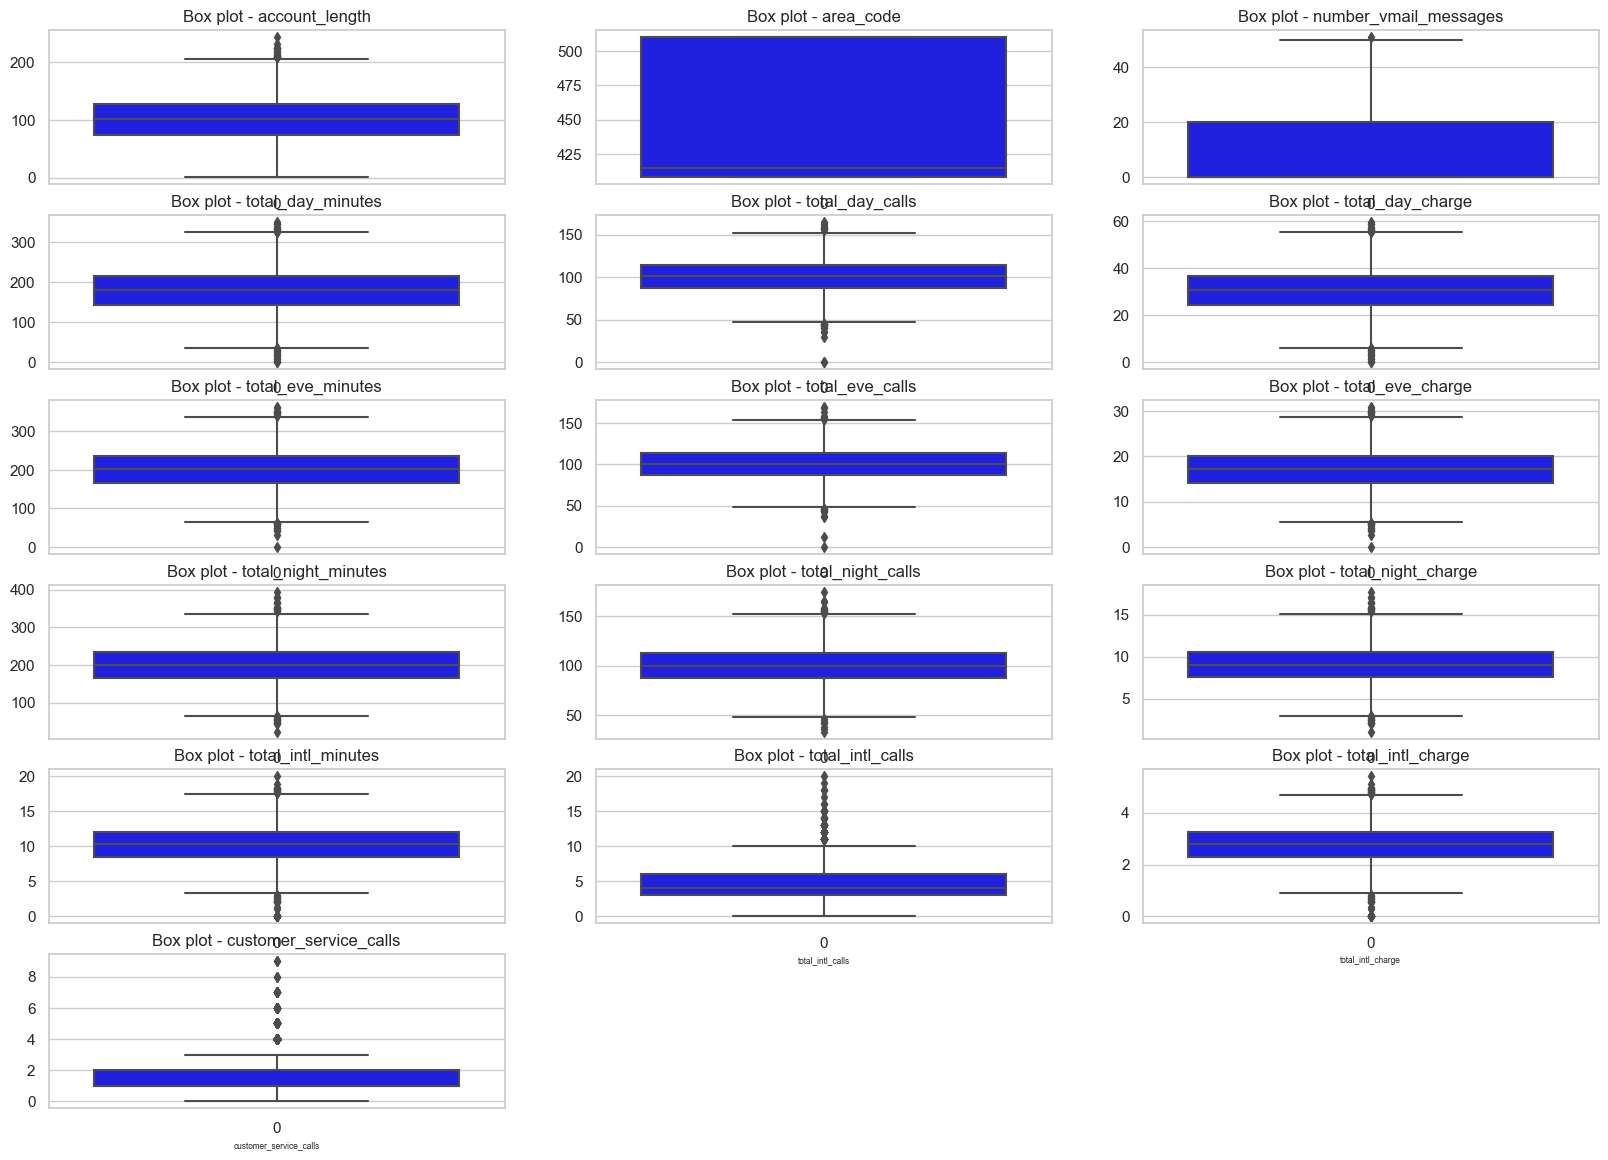

In [11]:
# check for outliers

# create al list of numerical columns
numeric_cols=churn_data.select_dtypes('number').columns

# calculate number of rows and cols for subplots
nrows=(len(numeric_cols) - 1) // 3+ 1
ncols = min(len(numeric_cols), 3)

# create subplots
fig,ax=plt.subplots(nrows,ncols,figsize=(20,14))

# Generate boxplots for each numeric column
for i,column in enumerate(numeric_cols):
    row=i//ncols
    col=i % ncols
    sns.boxplot(data=churn_data[column],ax=ax[row,col],color='blue')
    ax[row, col].set_title(f'Box plot - {column}', fontsize=12)
    ax[row, col].set_xlabel(column, fontsize=6)

# Remove any empty subplot
if i < (nrows * ncols) - 1:
    for j in range(i + 1, nrows * ncols):
        fig.delaxes(ax.flatten()[j])

plt.tight_layout;

There are outliers but not to the extreme.

In [12]:
# Check the data types of categorical variables
col = ['state', 'area_code', 'international_plan', 'voice_mail_plan']
col_dt = churn_data[col].dtypes
print(col_dt)

state                 object
area_code              int64
international_plan    object
voice_mail_plan       object
dtype: object


Area code was encoded as numeric therefore we change it to categorical.

In [13]:
# Convert the State column to a categorical data type
churn_data["area_code"] = churn_data["area_code"].astype("str")
print(churn_data["area_code"].dtype)

object


In [14]:
# Convert the Churn column from boolean to integer
churn_data["churn"] = churn_data["churn"].astype(int)
print(churn_data["churn"].dtype)

int32


In [15]:
# Drop the phone number column
churn_data.drop(columns=['phone_number'], inplace=True)

Dropped the phone number column since it is irrelevant.

# Data Analysis

We will conduct a Univariate, Bivariate and Multivariate Analysis of the dataset.

## 1.Univariate Analysis

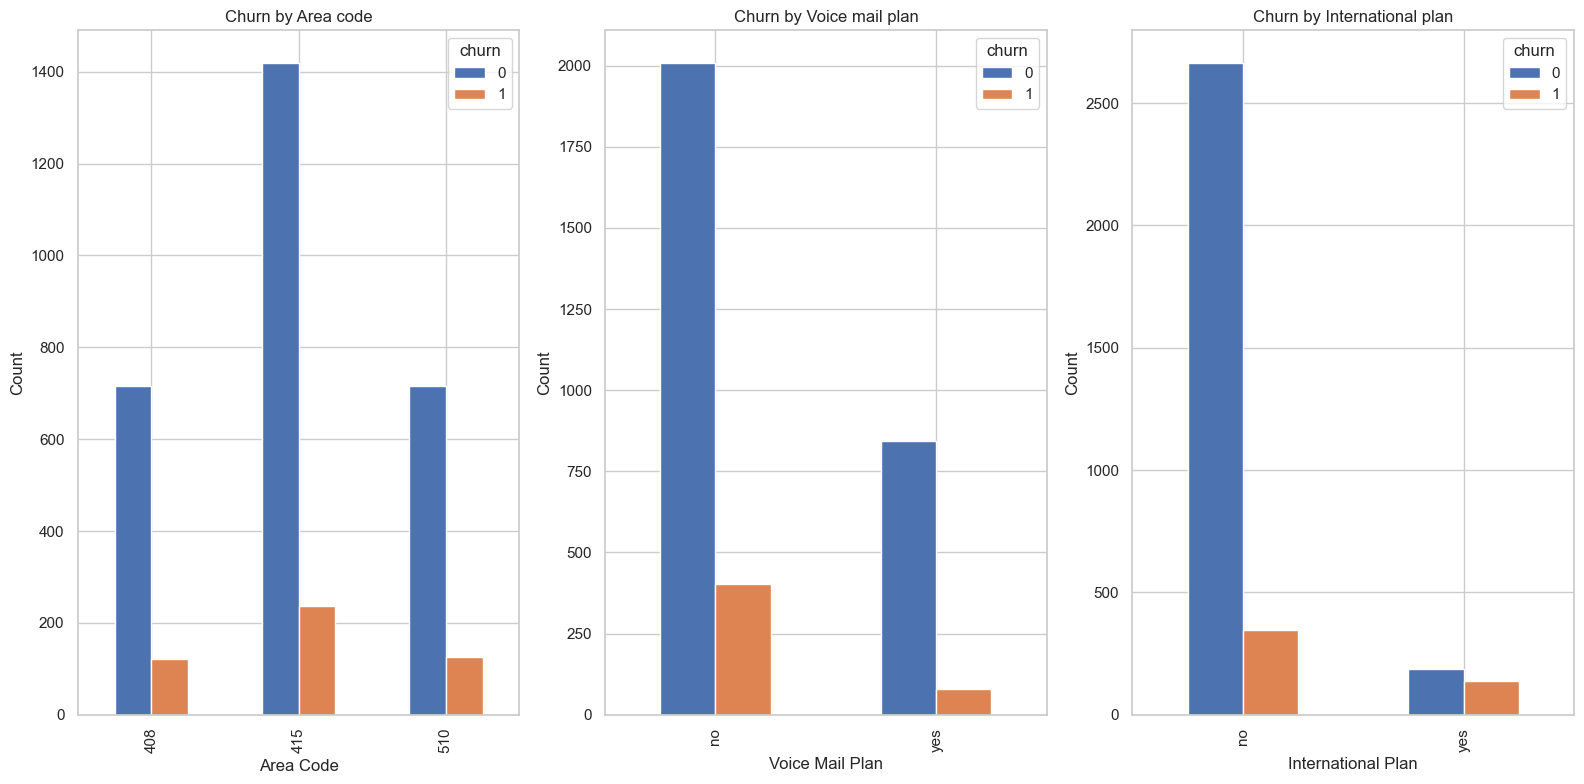

In [16]:
# Set up figure and axes for subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

# Group by area code and churn, unstack and plot
churn_data.groupby(["area_code", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[0])
axs[0].set_title('Churn by Area code')
axs[0].set_xlabel('Area Code')
axs[0].set_ylabel('Count')

# Group by voice mail plan & churn, unstack and plot
churn_data.groupby(["voice_mail_plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[1])
axs[1].set_title('Churn by Voice mail plan')
axs[1].set_xlabel('Voice Mail Plan')
axs[1].set_ylabel('Count')

# Group by international plan & churn, unstack and plot
churn_data.groupby(["international_plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[2])
axs[2].set_title('Churn by International plan')
axs[2].set_xlabel('International Plan')
axs[2].set_ylabel('Count')

# Adjust layout & spacing
plt.tight_layout()
plt.show()

1. Analysis of Area Codes.
   - There is notable variation in churn rates across different area codes.
   - Although area codes 510 and 408 show fewer instances of churn, it is essential to consider the size of the customer base in each area code for a comprehensive understanding.
   - Area code 415 has the highest churn rate, whereas area code 408 has the lowest.

2. Assessment of International Plan.
   - SyriaTel offers an international calling plan to a customer base of under 500 users.
   - The churn rate among customers with this international plan closely matches the number of subscribers, indicating a significant risk of churn within this group.

3. Evaluation of Voice Mail Plan.
   - SyriaTel provides an optional voice mail plan to its customers.
   - A large number of customers have not subscribed to the voice mail plan.
   - Customers who have subscribed to the voice mail plan show a lower probability of churn compared to those who have not.


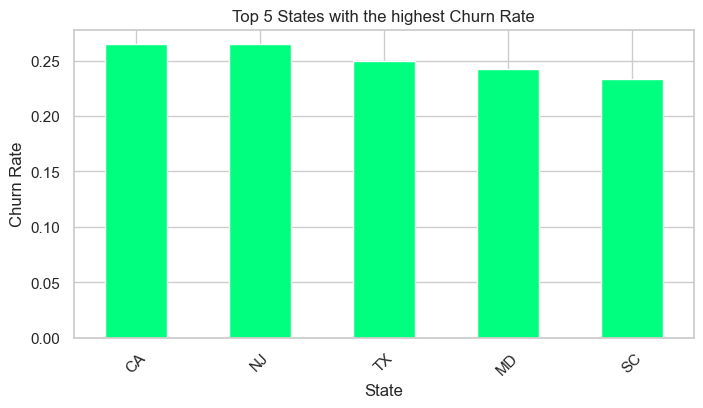

In [17]:
# Calculate the churn rate for each state
state_churn_rate = churn_data.groupby('state')['churn'].mean().sort_values(ascending=False)

# Get top states with the highest churn rate
top_statechr = state_churn_rate.head(5)  # Change 5 to the desired number of states

# Plot top states with the highest churn rate
plt.figure(figsize=(8, 4))
top_statechr.plot(kind='bar',color='springgreen')
plt.title('Top 5 States with the highest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show();

The top 5 states with the highest churn rate are: New Jersey, California, Texas, Maryland and South Carolina.

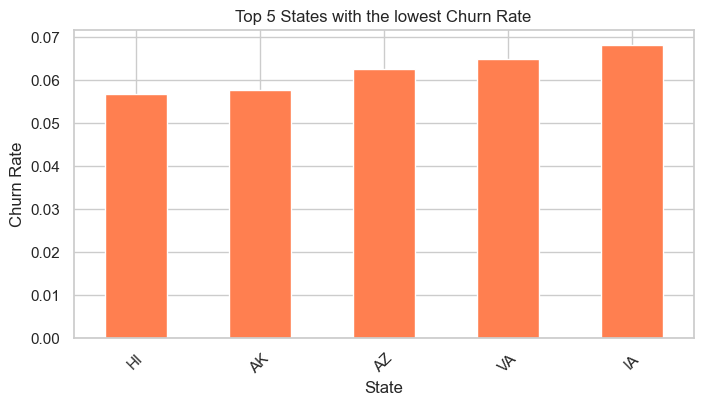

In [18]:
# Calculate the churn rate for each state
state_churn_rate = churn_data.groupby('state')['churn'].mean().sort_values()

# Get top states with the lowest churn rate
bottom_stateschr = state_churn_rate.head(5) 

# Plot top states with the lowest churn rate
plt.figure(figsize=(8, 4))
bottom_stateschr.plot(kind='bar', color='coral')
plt.title('Top 5 States with the lowest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show();


The top 5 states with the low churn rates are Hawaii, Alaska, Arizona, Virginia, Louisiana.

## 2.Bivariate Analysis

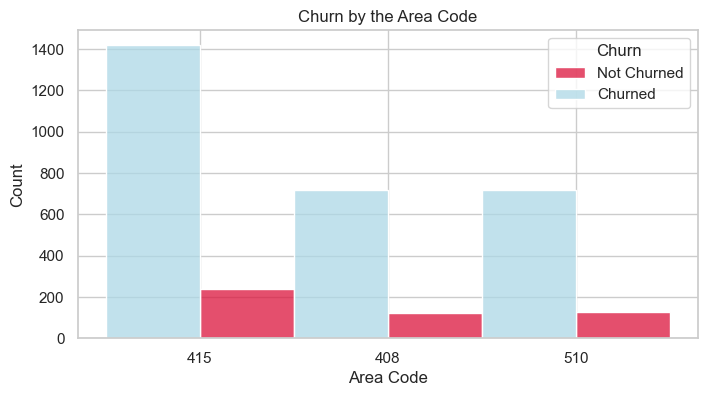

In [19]:
# Define the colors
colors = ['lightblue','crimson']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot churn by area codes
plt.figure(figsize=(8, 4))
sns.histplot(data=churn_data, x='area_code', hue='churn', multiple='dodge', palette=colors)

# Add a legend with custom labels
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Adjust labels
plt.xlabel('Area Code')
plt.ylabel('Count')

# Title
plt.title('Churn by the Area Code')

# Show plot
plt.show();


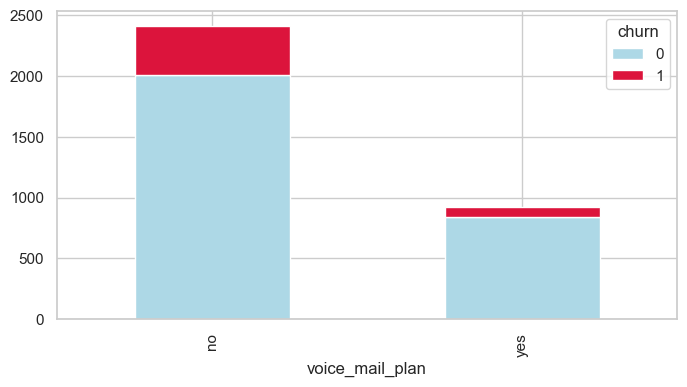

The percentage of customers who are subscribed to the voice_mail_plan is 27.66%
The percentage of subscribed customers who churned with the voice_mail_plan is 8.68%


In [20]:
#function for a diff plan
def churn_vs_plan(data, plan_column):
    # Plot churn vs plan
    data.groupby([plan_column, 'churn']).size().unstack().plot(
        kind='bar', stacked=True, figsize=(8,4))
    plt.show()

    # Calculate percentage of customers that are subscribed to the plan
    tot_customers = len(data)
    tot_subscribed = sum(data[plan_column] == 'yes')
    percent_subscribed = (tot_subscribed / tot_customers) * 100
    print('The percentage of customers who are subscribed to the {} is {:.2f}%'.format(plan_column, percent_subscribed))

    # Calculate percentage of churned customers among those subscribed to the plan
    churned_with_plan = sum((data[plan_column] == 'yes') & (data['churn'] == True))
    percent_churned_with_plan = (churned_with_plan / tot_subscribed) * 100
    print('The percentage of subscribed customers who churned with the {} is {:.2f}%'.format(plan_column, percent_churned_with_plan))
# voice mail plan
churn_vs_plan(churn_data,'voice_mail_plan')

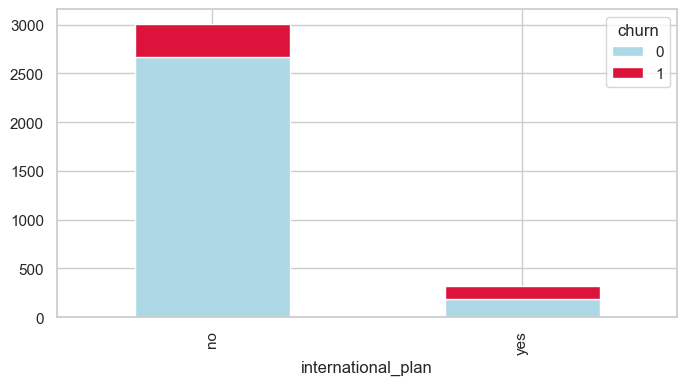

The percentage of customers who are subscribed to the international_plan is 9.69%
The percentage of subscribed customers who churned with the international_plan is 42.41%


In [21]:
churn_vs_plan(churn_data,'international_plan')

## 3.Multivariate Analysis

In [22]:
# Defining a function to check highly correlated features
def check_multico(churn_data,threshold=0.8):
    corr_mat=churn_data.select_dtypes('number').corr().abs()
    correlated_p=set()
    for col in corr_mat:
        correlated_cols=corr_mat.index[corr_mat[col]>threshold]
        correlated_p.update([(min(col,correlated_col),max(col,correlated_col))for correlated_col in correlated_cols if col != correlated_col])

    for i in correlated_p:
        print(f"{i[0]} --- {i[1]}")
    return set(churn_data.columns) & set(col for i in correlated_p for col in i)


In [23]:
# call function to check for multicollinearity
multicoll_features = check_multico(churn_data)

total_eve_charge --- total_eve_minutes
total_intl_charge --- total_intl_minutes
total_night_charge --- total_night_minutes
total_day_charge --- total_day_minutes


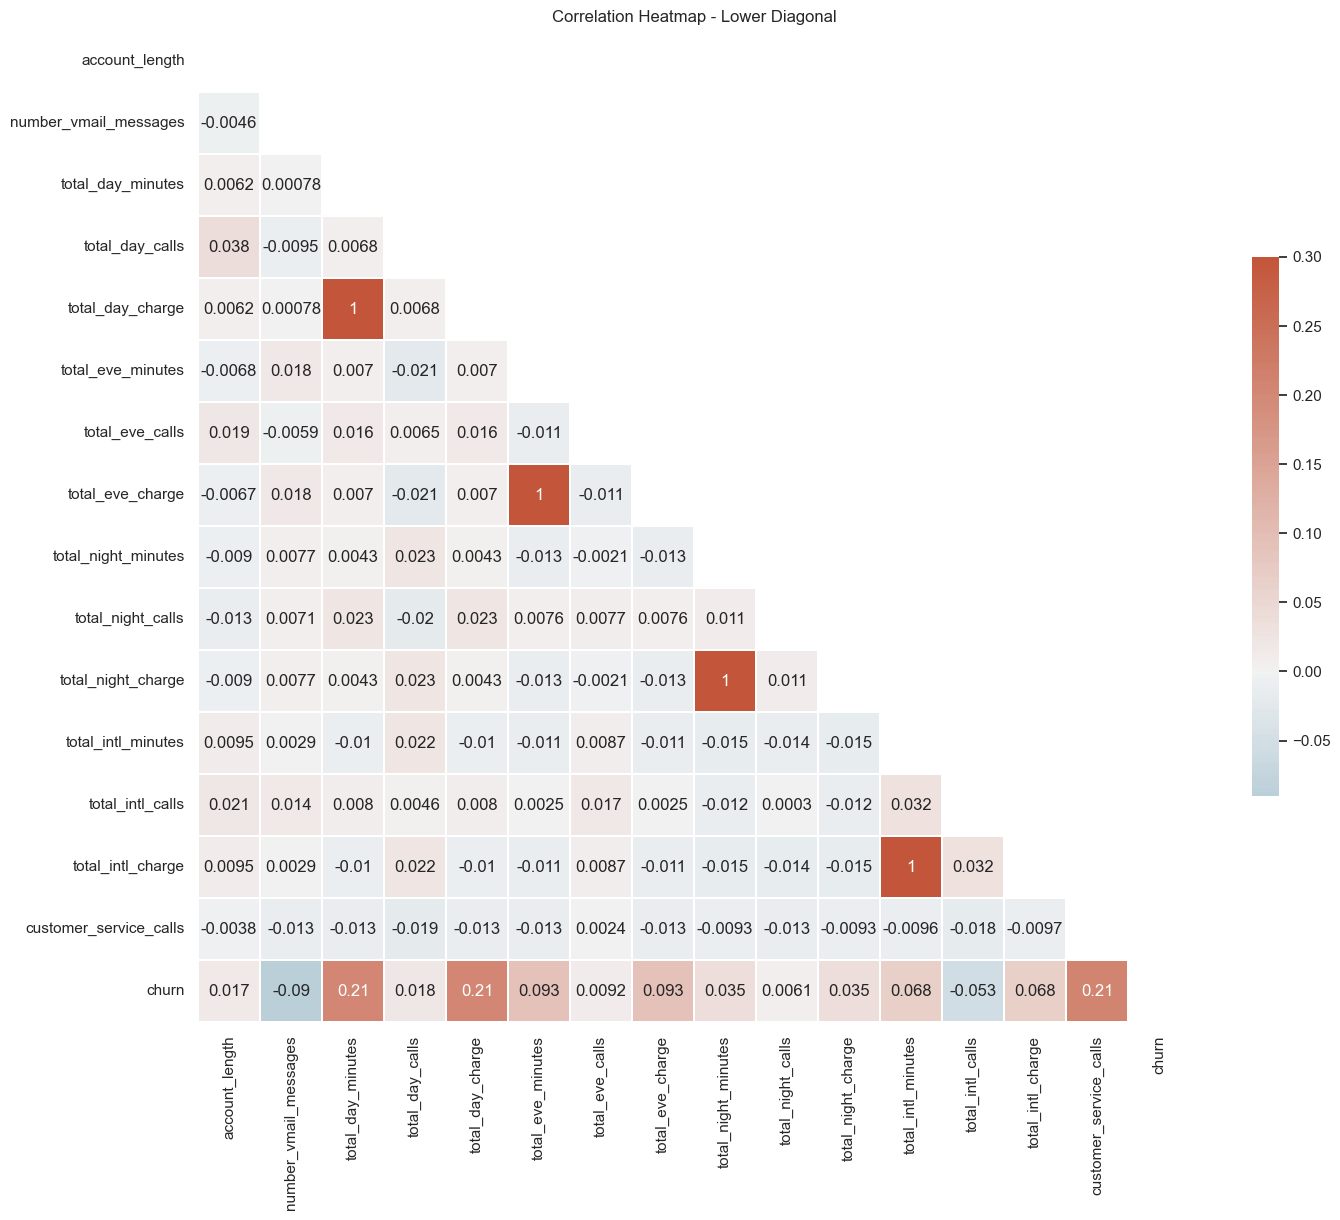

In [24]:
# Filter numeric columns
numeric_col = churn_data.select_dtypes('number')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(numeric_col.corr(), dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(numeric_col.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Heatmap - Lower Diagonal")
plt.show();

# Data Processing

## 1.Label Encoding

We will convert the categorical data i.e: international plan, voicemail plan and churn into numerical values by assigning each category a distinct integer (0/1)

In [25]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   object 
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [26]:
# Categorical columns
categ_cols=['international_plan','voice_mail_plan','churn']

# Encode categorical columns
churn_data[categ_cols]=churn_data[categ_cols].apply(LabelEncoder().fit_transform)
churn_data.dtypes

state                      object
account_length              int64
area_code                  object
international_plan          int32
voice_mail_plan             int32
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                       int64
dtype: object

## 2.One hot coding

We will one hot encode the states and area column where we will convert these categorical variables to multiple binary columns.

In [27]:
# Instance of the OneHotEncoder
encod = OneHotEncoder(dtype=np.int64, sparse=False)

# Encode state column
encoded_state = encod.fit_transform(churn_data[["state"]])

# Create a DataFrame with encoded state 
state_df = pd.DataFrame(encoded_state, columns=encod.get_feature_names_out(["state"]))

# Concatenate encoded state columns with  original DataFrame
he_df = pd.concat([churn_data, state_df], axis=1)

# Remove original state column
he_df = he_df.drop(["state"], axis=1)

he_df.head(5)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Encode area code
encod_ac = encod.fit_transform(churn_data[["area_code"]])

# Create DataFrame with encoded area code 
state_df = pd.DataFrame(encod_ac, columns=encod.get_feature_names_out(["area_code"]))

# Concatenate encoded area code columns with original DataFrame
he_df = pd.concat([he_df, state_df], axis=1)

# Remove original area code column
he_df = he_df.drop(["area_code"], axis=1)

he_df.head(5)

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0


# 3.Scaling

We will use the StandardScaler to adjust the values of multiple variables to make them comparable so as to fall in a consistent range.

In [29]:
# we will assign df1 to our current dataframe
cdf=he_df
cdf

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,0,0,0,0,0,0,0,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,0,0,0,0,0,1,0,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,0,0,0,0,0,0,0,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,0,0,0,0,0,0,0,0,0,1


In [30]:
col_names=cdf.columns.to_list()
col_names

['account_length',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls',
 'churn',
 'state_AK',
 'state_AL',
 'state_AR',
 'state_AZ',
 'state_CA',
 'state_CO',
 'state_CT',
 'state_DC',
 'state_DE',
 'state_FL',
 'state_GA',
 'state_HI',
 'state_IA',
 'state_ID',
 'state_IL',
 'state_IN',
 'state_KS',
 'state_KY',
 'state_LA',
 'state_MA',
 'state_MD',
 'state_ME',
 'state_MI',
 'state_MN',
 'state_MO',
 'state_MS',
 'state_MT',
 'state_NC',
 'state_ND',
 'state_NE',
 'state_NH',
 'state_NJ',
 'state_NM',
 'state_NV',
 'state_NY',
 'state_OH',
 'state_OK',
 'state_OR',
 'state_PA',
 'state_RI',
 'state_SC',
 'state_SD',
 'state_TN',
 'state_TX',
 'state_UT',
 'state_VA',
 'state_VT',
 's

In [31]:
# Drop non_numeric columns from numeric columns
numeric_cols=[col for col in cdf.columns if cdf[col].dtype != 'object']

# Clean numeric columns by replacing missing values with mean values
cdf[numeric_cols]=cdf[numeric_cols].fillna(cdf[numeric_cols].mean())

# Convert non_numeric columns to numeric or NaN
cdf[numeric_cols]=cdf[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df1=cdf.dropna(subset=numeric_cols)

# Initialize MinMaxScaler
scaler=MinMaxScaler()

if len(numeric_cols) == 0:
    print("No numeric columns found.")
# else:
#     # Fit and transform the data
#     df1[numeric_cols]=scaler.fit_transform(df1[numeric_cols])

In [32]:
#Defin your columns
numeric_cols=['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes']
binary_cols=['international_plan','voice_mail_plan']

# Scale numeric columns
scaler=StandardScaler()
scaled_numeric_cols=scaler.fit_transform(cdf[numeric_cols])
cdf_scaled=pd.DataFrame(scaled_numeric_cols,columns=numeric_cols)

# Check if 'number voice mail messages' exists in numeric columns
if 'number_vmail_messages' in numeric_cols:
    # Concatenate scaled numeric columns with binary columns
    cdf_scaled=pd.concat([cdf_scaled,df1[binary_cols]],axis=1)
else:
    print("'number vmail messages'column not found in numeric columns")

# Check if 'area code' is in df1 before using it
if 'area code' in cdf.columns:
    # Create instance of the OneHotEncoder with right parameter
    encod=OneHotEncoder(dtype=np.int64, sparse=False)

    # Fit and transform the 'are code' column
    encod_ac=encod.fit_transform(cdf['area_code'])

    # Create a DataFrame with encoded area code columns
    encoded_ac_df=pd.DataFrame(encod_ac,columns=encod.get_feature_names_out(['area code']))

    # Concatenate the encoded area code columns with the original dataframe
    cdf=pd.concat([cdf,encoded_ac_df],axis=1)

    # Drop original 'area code' column
    cdf.drop('area_code',axis=1,inplace=True)

# Cocatenate binary columns
if set(binary_cols).issubset(cdf.columns):
    cdf_scaled=pd.concat([cdf_scaled,cdf[binary_cols]],axis=1)

cdf_scaled  

'number vmail messages'column not found in numeric columns


,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,international_plan,voice_mail_plan
0,1.566767,-0.070610,0.866743,-0.085008,0,1
1,-0.333738,-0.108080,1.058571,1.240482,0,1
2,1.168304,-1.573383,-0.756869,0.703121,0,0
3,2.196596,-2.742865,-0.078551,-1.303026,1,0
4,-0.240090,-1.038932,-0.276311,-0.049184,1,0
...,...,...,...,...,...,...
3328,-0.432895,0.286348,1.547039,-0.120832,0,1
3329,0.942447,-0.938353,-0.189297,-0.228304,0,0
3330,0.018820,1.731930,-0.177431,1.383778,0,0
3331,0.624778,-0.816080,-1.219628,-1.876211,1,0


In [33]:
# Drop non-numeric columns from numeric_columns
numeric_cols = [col for col in numeric_cols if cdf[col].dtype != 'object']

# Clean numeric columns by replacing NaNs with mean values
cdf[numeric_cols] = cdf[numeric_cols].fillna(cdf[numeric_cols].mean())

# Convert non-numeric values to numeric or NaN
cdf[numeric_cols] = cdf[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
cdf = cdf.dropna(subset=numeric_cols)

# Initialize MinMaxScaler 
scaler = MinMaxScaler()  

if len(numeric_cols) == 0:
    print("No numeric columns found.")
else:
    # Scale the numeric columns
    cdf[numeric_cols] = scaler.fit_transform(df1[numeric_cols])

# Convert scaled data to a DataFrame
cdf_scaled = pd.DataFrame(df1[numeric_cols], columns=numeric_cols)

# Define binary columns
binary_cols = ['area code', 'churn', 'international plan', 'voice mail plan',
               'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA',
               'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
               'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
               'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
               'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
               'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
               'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY',
               'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
               'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
               'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY']

# Check if 'number vmail messages' exists in numeric_columns
if 'number vmail messages' in numeric_cols:
    # Concatenate scaled numeric columns with binary columns
    cdf_scaled = pd.concat([cdf_scaled, df1[binary_cols]], axis=1)
else:
    print("number vmail messages column not found in numeric_columns.")


number vmail messages column not found in numeric_columns.


In [34]:
cdf.dtypes

account_length             int64
international_plan         int32
voice_mail_plan            int32
number_vmail_messages      int64
total_day_minutes        float64
                          ...   
state_WV                   int64
state_WY                   int64
area_code_408              int64
area_code_415              int64
area_code_510              int64
Length: 72, dtype: object

## 4. Splitting data
Here, we will split the data in order to train and evalute the models. We will use either cross-validation and train-test split methods.

In [35]:

# Define your columns
numeric_cols = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', 'number_vmail_messages']
binary_cols = ['international_plan', 'voice_mail_plan']

# Ensure 'churn' is in the DataFrame
if 'churn' not in cdf.columns:
    raise KeyError("'churn' column not found in the original DataFrame")

# Scale numeric columns
scaler = StandardScaler()
scaled_numeric_cols = scaler.fit_transform(cdf[numeric_cols])
cdf_scaled = pd.DataFrame(scaled_numeric_cols, columns=numeric_cols)

# Concatenate scaled numeric columns with binary columns if they exist
if set(binary_cols).issubset(cdf.columns):
    cdf_scaled = pd.concat([cdf_scaled, cdf[binary_cols].reset_index(drop=True)], axis=1)

# Check if 'area code' is in df1 before using it
if 'area code' in cdf.columns:
    # Create an instance of the OneHotEncoder with the correct parameter
    encod = OneHotEncoder(dtype=np.int64, sparse_output=False)

    # Fit and transform the "area code" column
    encoded_ac = encod.fit_transform(cdf[["area code"]])

    # Create a DataFrame with the encoded area code columns
    encoded_ac_df = pd.DataFrame(encoded_ac, columns=encod.get_feature_names_out(["area code"]))

    # Concatenate the encoded area code columns with the original DataFrame
    cdf = pd.concat([df1, encoded_ac_df], axis=1)

    # Drop the original "area code" column if necessary
    df1.drop("area code", axis=1, inplace=True)

# Ensure the 'churn' column is added to the final DataFrame
cdf_scaled['churn'] = df1['churn'].reset_index(drop=True)

# Specify features (X) and target variable (y)
X = cdf_scaled.drop(columns=['churn'])  # Features
y = cdf_scaled['churn']  # Target variable

# Split the data into training and testing sets (train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the updated DataFrame
cdf_scaled.head()


,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,number_vmail_messages,international_plan,voice_mail_plan,churn
0,1.566767,-0.070610,0.866743,-0.085008,1.234883,0,1,0
1,-0.333738,-0.108080,1.058571,1.240482,1.307948,0,1,0
2,1.168304,-1.573383,-0.756869,0.703121,-0.591760,0,0,0
3,2.196596,-2.742865,-0.078551,-1.303026,-0.591760,1,0,0
4,-0.240090,-1.038932,-0.276311,-0.049184,-0.591760,1,0,0


In [36]:
# Specify features and target variable
X = cdf_scaled.drop(columns=['churn'])
y = cdf_scaled['churn'] 

# Split data to training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 2666
Test set size: 667


## 5.Imbalance handling

Here we will handle class imbalance using SMOTE to ensure that the models don't have a poor perfomance

In [37]:
oversp = SMOTE()

X_train_smote, y_train_smote = oversp.fit_resample(X_train, y_train)

print(X_train_smote.shape, y_train_smote.shape)

(4568, 7) (4568,)


In [38]:
y_train_smote.value_counts()

1    2284
0    2284
Name: churn, dtype: int64

# Modelling

## 1.Baseline Model

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# Define the logistic regression model within a pipeline
model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

# Perform k-fold cross-validation on the training set
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='accuracy')

# Print cross-validation scores
print("Cross-val scores:", cv_scores)
print("Mean CV acc:", cv_scores.mean())

# Train the logistic regression model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("\nLogistic Regression Evaluation:")
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Cross-val scores: [0.85018727 0.87054409 0.82926829 0.85928705 0.8836773 ]
Mean CV acc: 0.858592800275453

Logistic Regression Evaluation:
Accuracy: 0.8575712143928036
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.62      0.15      0.24       101

    accuracy                           0.86       667
   macro avg       0.75      0.57      0.58       667
weighted avg       0.83      0.86      0.82       667



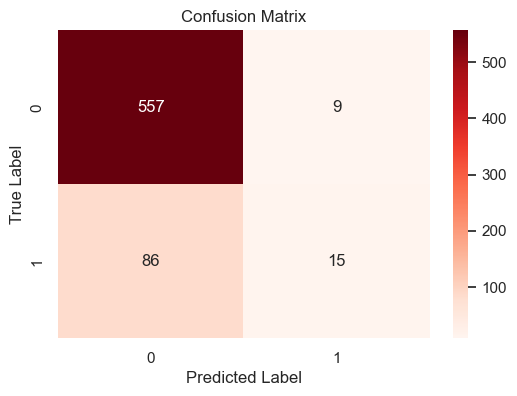

In [40]:
# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Findings

Accuracy: The model achieves an overall accuracy of about 84.56%, correctly classifying approximately 84.56% of the test dataset instances.

Precision and Recall: For class 1, the precision is 0.46, meaning that 46% of the instances predicted as positive are actually positive. The recall for class 1 is 0.11, indicating that only 11% of the actual positive instances are correctly identified.

F1-score: The F1-score balances precision and recall. For class 1, the F1-score is 0.18, highlighting the model's poor performance in accurately predicting positive instances.

Confusion Matrix: The confusion matrix shows the model's predictions against the actual class labels:

True Negatives (TN): 553, 
False Negatives (FN): 90, 
True Positives (TP): 11, 
False Positives (FP): 13

The model performs well in identifying true negatives (non-churners) but has difficulty predicting true positives (churners), as indicated by the high number of false negatives and the low recall for class 1.

## 2.Gradient Boosting Model

In [41]:
# Build GBM model
gbm = GradientBoostingClassifier(random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Make predictions
y_pred = gbm.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9145427286356822
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       566
           1       0.91      0.49      0.63       101

    accuracy                           0.91       667
   macro avg       0.91      0.74      0.79       667
weighted avg       0.91      0.91      0.90       667



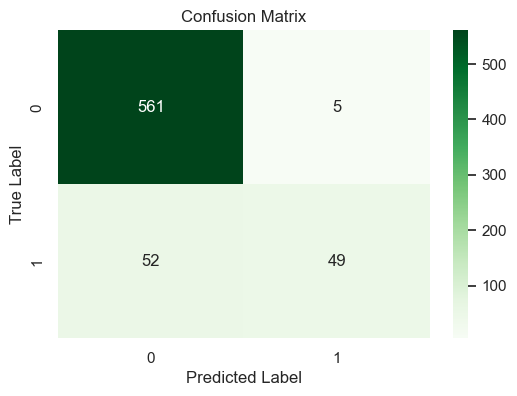

In [42]:
# Compute confusion matrix
conf_m = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Findings

Accuracy: The model has an overall accuracy of about 88.16%, meaning it correctly predicts the class label for 88.16% of the test dataset instances.

Precision and Recall: For class 1, the precision is 0.78, showing that 78% of the instances predicted as positive are correct. The recall for class 1 is 0.31, indicating that 31% of the actual positive instances are accurately identified.

F1-score: The F1-score for class 1 is 0.44, indicating moderate performance in correctly predicting positive instances.

Confusion Matrix: The confusion matrix breaks down the model's predictions against the actual class labels:

True Negatives (TN): 557, 
False Negatives (FN): 70, 
True Positives (TP): 31, 
False Positives (FP): 9

The model excels at predicting true negatives (non-churners) but struggles with accurately predicting churners, as evidenced by the lower recall and precision for class 1 compared to class 0, and the relatively high number of false negatives.


## 3.XGboost Classifier

In [43]:
#  Initialize the XGBoost model
xgbm = xgb.XGBClassifier()

# Train the XGBoost model
xgbm.fit(X_train, y_train)

# Make predictions with XGBoost
y_predx = xgbm.predict(X_test)

# Evaluate XGBoost model performance
acc_xgb = accuracy_score(y_test, y_predx)
print("\nXGBoost Accuracy:", acc_xgb)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_predx))


XGBoost Accuracy: 0.9175412293853074
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       566
           1       0.85      0.55      0.67       101

    accuracy                           0.92       667
   macro avg       0.89      0.77      0.81       667
weighted avg       0.91      0.92      0.91       667



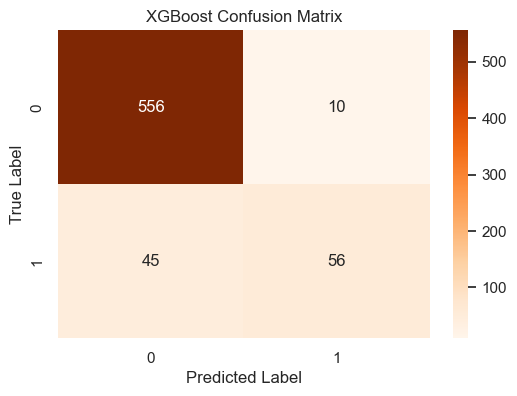

In [44]:
# Compute confusion matrix for XGBoost model
conf_m = confusion_matrix(y_test, y_predx)

# Plot confusion matrix for XGBoost model
plt.figure(figsize=(6, 4))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix')
plt.show()

### Findings

Accuracy: The XGBoost model achieves an overall accuracy of around 87.71%, accurately predicting the class label for 87.71% of the test dataset instances.

Precision and Recall: For class 1, the precision is 0.69, meaning 69% of the instances predicted as positive are correct. The recall for class 1 is 0.34, indicating that 34% of the actual positive instances are accurately identified.

F1-score: The F1-score for class 1 is 0.45, reflecting moderate performance in predicting positive instances accurately.

Confusion Matrix: The confusion matrix details the model's predictions against actual class labels:

True Negatives (TN): 551, 
False Negatives (FN): 67, 
True Positives (TP): 34, 
False Positives (FP): 15

This model performs well in identifying true negatives (non-churners) but has difficulty accurately predicting churners, as shown by the lower recall and precision for class 1 compared to class 0 and the relatively high number of false negatives.


In [45]:
# Define preprocessing steps
preprocessor = Pipeline([
    ('scaler', StandardScaler()),  
    
])

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Define pipelines for each model
pipe = {name: Pipeline([('preprocessor', preprocessor), ('model', model)]) for name, model in models.items()}

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform cross-validation and hyperparameter tuning
for name, pipe in pipe.items():
    # Perform cross-validation
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} CV Accuracy: {scores.mean():.4f} +/- {scores.std():.4f}")
    
    
# Evaluate best model on test set
bestm = pipe['model'] 
bestm.fit(X_train, y_train)
test_accuracy = bestm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Logistic Regression CV Accuracy: 0.8578 +/- 0.0143
Gradient Boosting CV Accuracy: 0.9096 +/- 0.0079
XGBoost CV Accuracy: 0.9058 +/- 0.0117
Test Accuracy: 0.9175


## Tuning the best two models

In [46]:
# Creating a dictionary to store the models and their performance metrics
modelspf = {
    "Logistic Regression": {
        "Accuracy": 0.85,
        "Precision": 0.46,
        "Recall": 0.11,
        "F1-score": 0.18
    },
    "XGBoost": {
        "Accuracy": 0.88,
        "Precision": 0.69,
        "Recall": 0.34,
        "F1-score": 0.45
    },
    "Gradient Boosting":{
        "Accuracy": 0.88,
        "Precision": 0.78,
        "Recall": 0.31,
        "F1-score": 0.45
    }
}

# Define the metric to use for ranking the models
metric = "Accuracy"

# Sort the models based on the specified metric in descending order
sorted_models = sorted(modelspf.items(), key=lambda x: x[1][metric], reverse=True)

# Display the top three best performing models
print("Top Three Best Performing Models based on", metric, "are:")
for i, (model, metrics) in enumerate(sorted_models[:3], 1):
    print(f"{i}. {model}: {metrics[metric]}")


Top Three Best Performing Models based on Accuracy are:
1. XGBoost: 0.88
2. Gradient Boosting: 0.88
3. Logistic Regression: 0.85


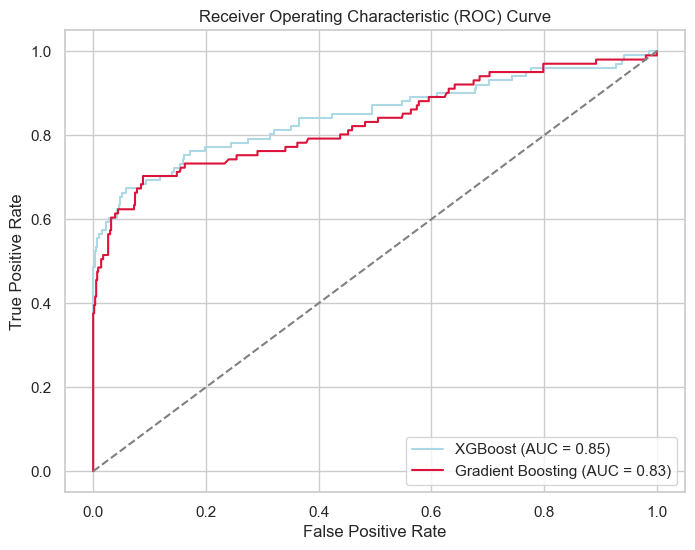

In [47]:

# Define your XGBoost model
xgbm = xgbm

# Define the hyperparameters grid for XGBoost
xgb_param = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Perform GridSearchCV for XGBoost
xgbm_grid = GridSearchCV(estimator=xgbm, param_grid=xgb_param, scoring='accuracy', cv=5)
xgbm_grid.fit(X_train, y_train)

# Get the best parameters and best score for XGBoost
besxgb_params = xgbm_grid.best_params_
besxgb_score = xgbm_grid.best_score_

# Define your Gradient Boosting model
gbm_model = GradientBoostingClassifier()

# Define the hyperparameters grid for Gradient Boosting
gbm_param = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Perform GridSearchCV for Gradient Boosting
gbm_grid = GridSearchCV(estimator=gbm_model, param_grid=gbm_param, scoring='accuracy', cv=5)
gbm_grid.fit(X_train, y_train)

# Get the best parameters and best score for Gradient Boosting
besgb_params = gbm_grid.best_params_
besgb_score = gbm_grid.best_score_


# Plot ROC curves and calculate AUC for each model
plt.figure(figsize=(8, 6))

# XGBoost
xgb_probs = xgbm_grid.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Gradient Boosting
gb_probs = gbm_grid.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')


# Plot ROC curve for random classifier (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()


### Findings

The optimal ROC curve in the graph corresponds to the Gradient Boosting model, indicating its superior performance by achieving the best balance between correctly identifying positive instances and minimizing false positives.

## Model Evaluation

Three models were tested: Logistic Regression, Gradient Boosting, and XGBoost. After evaluation, two models were fine-tuned for improved performance. The Test ROC AUC Score measures the model's ability to distinguish between positive and negative outcomes.In this case, Gradient Boosting had the highest score of 0.76, indicating superior performance in differentiating between outcomes. 

Gradient Boosting outperformed the other models, demonstrating higher accuracy and a better balance between true positives and false positives. It effectively identifies customers likely to leave while minimizing false positives.

## Feature Selection

In [48]:
# Define classifier
cf = RandomForestClassifier()

from sklearn.feature_selection import RFECV
# Define feature selector with cross-validation
rfecv = RFECV(estimator=cf, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# Fit feature selector to the data
rfecv.fit(X_train, y_train)

# Get selected features
selected_f = X_train.columns[rfecv.support_]

# Train a new model using selected features
selectedcf = RandomForestClassifier()
selectedcf.fit(X_train[selected_f], y_train)

# Evaluate performance of the model on the test set
y_pred = selectedcf.predict(X_test[selected_f])
accuracy = accuracy_score(y_test, y_pred)

print("Selected Features:", selected_f)
print("Accuracy with Selected Features:", accuracy)


Selected Features: Index(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
       'total_intl_minutes', 'number_vmail_messages', 'international_plan',
       'voice_mail_plan'],
      dtype='object')
Accuracy with Selected Features: 0.9145427286356822


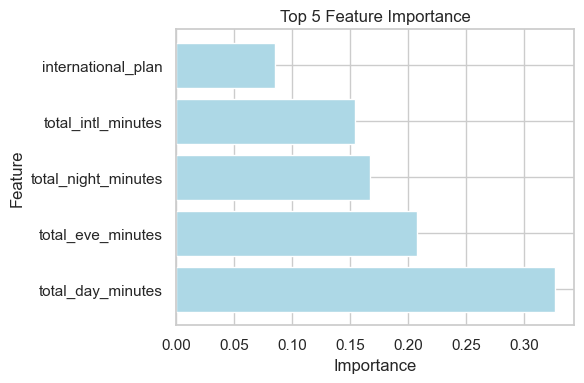

In [49]:
# Initialize Random Forest model
rf_m = RandomForestClassifier()

# Train the model
rf_m.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_m.feature_importances_

# Get feature names
feature_n = X_train.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot top 10 feature importances
top_n = 5
plt.figure(figsize=(6, 4))
plt.barh(range(top_n), feature_importances[sorted_indices][:top_n], align='center')
plt.yticks(range(top_n), feature_n[sorted_indices][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importance')
plt.tight_layout()
plt.show()

In [50]:
# Get top 5 feature names
top5_fnames = feature_n[sorted_indices][:top_n]

print("Top 5 Feature Names:")
print(top5_fnames)


Top 5 Feature Names:
Index(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
       'total_intl_minutes', 'international_plan'],
      dtype='object')


In [51]:
# Extract top 5 feature names
top5_fnames = feature_n[sorted_indices][:top_n]

# Select only the top 10 features from the dataset
X_train_t5 = X_train[top5_fnames]
X_test_t5 = X_test[top5_fnames]

# Initialize and train tuned Gradient Boosting model
tuned_gb_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
tuned_gb_model.fit(X_train_t5, y_train)

# Make predictions
y_pred = tuned_gb_model.predict(X_test_t5)

# Evaluate  model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics for Tuned Gradient Boosting Model using Top 10 Features:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Evaluation Metrics for Tuned Gradient Boosting Model using Top 10 Features:
Accuracy: 0.8920539730134932
Precision: 0.7843137254901961
Recall: 0.39603960396039606
F1-score: 0.5263157894736842


## Findings

The most important features when predicting churn were: Total day minutes, Total eve minutes, Total night minutes, Total Intl minutes, and International plan.

Compared to the previous Gradient Boost model, the optimized version shows improved precision, recall, and F1-score for churned customers. It maintains high accuracy and balances correctly identifying churned customers while minimizing false positives.

- Total day minutes, total night minutes, and total eve minutes: These features are key predictors of customer churn. Higher call durations during the day, night, and evening increase the likelihood of churn.
- International plan: The presence of an international plan also predicts churn. Customers without an international plan are more likely to leave, suggesting that offering appealing international plans might help retain them.
- Voicemail plan: The presence of a voicemail plan is also a key predictor of customer churn. Customers with a voice mail plan are less likely to churn compared to those without one therefore promoting the benefits of voicemail plans could help in  improving customer retention.


# Conclusion

Gradient Boosting outperformed the other models, demonstrating higher accuracy and a better balance between true positives and false positives. 
It effectively identifies customers likely to leave while minimizing false positives.

Several features such as the total day minutes, total night minutes, total eve minutes, international plan and voicemail plans are key predictors of churn. 
Higher call durations during the day, night and evening increase the likelihood of churn. 
Customers without an international plan and a voice mail plan are more likely to churn.

# Recommendation

- Introduce Loyalty Programs and Offers: Implement loyalty programs, exclusive offers, and perks to incentivize customer retention. Provide discounts, free upgrades, or access to premium content to reward long-term customers.

- Maintain Regular Communication: Keep in regular contact with customers through personalised emails, SMS, or in-app messages. Inform customers about new services, features, and promotions to keep them engaged and informed.

- Customise Customer Experience: Leverage customer data and analytics to understand individual preferences and behaviours. Tailor marketing messages, offers, and service suggestions to make each customer feel valued and improve their overall experience.

- Predict and Prevent Churn: Utilise data analytics and predictive modelling to identify potential churners. Implement targeted retention strategies to effectively reduce churn risks.

- Collect Customer Feedback: Actively seek feedback through surveys to understand customer pain points and areas for improvement. Use this feedback to enhance services and address customer needs effectively.


### Next steps to take

- Expand Data Collection:The current dataset is relatively small. Collecting more data could improve model performance and robustness.
- Deploy the Model: Once finalised, deploy the model in a production environment.
- Monitor and Update the Model: After deployment, continuously monitor the model's performance and update it regularly with new data to ensure it remains accurate and effective.
